In [19]:
'''
so we suspect that possibly 

To compare patterns:
use a % change calculation to calculate similarity between each %change
movement in the pattern finder. From those numbers, subtract them from 100, to
get a "how similar" #. From this point, take all 10 of the how similars,
and average them. Whichever pattern is MOST similar, is the one we will assume
we have found. 
'''
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import numpy as np
import time
from datetime import datetime 
from functools import reduce

totalStart = time.time()
date_converter = lambda x: mdates.date2num(datetime.strptime(x.decode('ascii'), '%Y%m%d%H%M%S'))
date, bid, ask = np.loadtxt('GBPUSD1d.txt', unpack=True, delimiter=',', converters={0: date_converter})
#avgLine = ((bid+ask)/2)

####DEFINE######
#CHANGE#
#patternAr = []
#performanceAr = []
#patForRec = []

def percentChange(startPoint, currentPoint):
    try:
        x = ((float(currentPoint)-startPoint)/abs(startPoint))*100.00
        if x == 0.0:
            return 0.000000001
        else:
            return x
    except:
        return 0.0001
    #return ((float(currentPoint)-startPoint)/abs(startPoint))*100.00

def patternStorage():
    '''
    The goal of patternFinder is to begin collection of %change patterns
    in the tick data. From there, we also collect the short-term outcome
    of this pattern. Later on, the length of the pattern, how far out we
    look to compare to, and the length of the compared range be changed,
    and even THAT can be machine learned to find the best of all 3 by
    comparing success rates.
    '''
    
    #####
    startTime = time.time()

    # required to do a pattern array, because the liklihood of an identical
    # %change across millions of patterns is fairly likely and would
    # cause problems. IF it was a problem of identical patterns,
    # then it wouldnt matter, but the % change issue
    # would cause a lot of harm. Cannot have a list as a dictionary Key.
    
    #MOVE THE ARRAYS THEMSELVES#
    
    x = len(avgLine)-30
    y = 31
    currentStance = 'none'
    
    while y < x:
        pattern = []
        p1 = percentChange(avgLine[y-30], avgLine[y-29])
        p2 = percentChange(avgLine[y-30], avgLine[y-28])
        p3 = percentChange(avgLine[y-30], avgLine[y-27])
        p4 = percentChange(avgLine[y-30], avgLine[y-26])
        p5 = percentChange(avgLine[y-30], avgLine[y-25])
        p6 = percentChange(avgLine[y-30], avgLine[y-24])
        p7 = percentChange(avgLine[y-30], avgLine[y-23])
        p8 = percentChange(avgLine[y-30], avgLine[y-22])
        p9 = percentChange(avgLine[y-30], avgLine[y-21])
        p10= percentChange(avgLine[y-30], avgLine[y-20])
		
        p11 = percentChange(avgLine[y-30], avgLine[y-19])
        p12 = percentChange(avgLine[y-30], avgLine[y-18])
        p13 = percentChange(avgLine[y-30], avgLine[y-17])
        p14 = percentChange(avgLine[y-30], avgLine[y-16])
        p15 = percentChange(avgLine[y-30], avgLine[y-15])
        p16 = percentChange(avgLine[y-30], avgLine[y-14])
        p17 = percentChange(avgLine[y-30], avgLine[y-13])
        p18 = percentChange(avgLine[y-30], avgLine[y-12])
        p19 = percentChange(avgLine[y-30], avgLine[y-11])
        p20= percentChange(avgLine[y-30], avgLine[y-10])
		
        p21 = percentChange(avgLine[y-30], avgLine[y-9])
        p22 = percentChange(avgLine[y-30], avgLine[y-8])
        p23 = percentChange(avgLine[y-30], avgLine[y-7])
        p24 = percentChange(avgLine[y-30], avgLine[y-6])
        p25 = percentChange(avgLine[y-30], avgLine[y-5])
        p26 = percentChange(avgLine[y-30], avgLine[y-4])
        p27 = percentChange(avgLine[y-30], avgLine[y-3])
        p28 = percentChange(avgLine[y-30], avgLine[y-2])
        p29 = percentChange(avgLine[y-30], avgLine[y-1])
        p30= percentChange(avgLine[y-30], avgLine[y])

        outcomeRange = avgLine[y+20:y+30]
        currentPoint = avgLine[y]
        #Define##########################
        #########change to try except for safety
        
        try:
            avgOutcome = reduce(lambda x, y: x + y, outcomeRange) / len(outcomeRange)
        except Exception as e:
            print(str(e))
            avgOutcome = 0
        #Define
        futureOutcome = percentChange(currentPoint, avgOutcome)

        #print some logics
        '''
        print 'where we are historically:',currentPoint
        print 'soft outcome of the horizon:',avgOutcome
        print 'This pattern brings a future change of:',futureOutcome
        print '_______'
        print p1, p2, p3, p4, p5, p6, p7, p8, p9, p10
        '''
        pattern.append(p1)
        pattern.append(p2)
        pattern.append(p3)
        pattern.append(p4)
        pattern.append(p5)
        pattern.append(p6)
        pattern.append(p7)
        pattern.append(p8)
        pattern.append(p9)
        pattern.append(p10)

        pattern.append(p11)
        pattern.append(p12)
        pattern.append(p13)
        pattern.append(p14)
        pattern.append(p15)
        pattern.append(p16)
        pattern.append(p17)
        pattern.append(p18)
        pattern.append(p19)
        pattern.append(p20)

        pattern.append(p21)
        pattern.append(p22)
        pattern.append(p23)
        pattern.append(p24)
        pattern.append(p25)
        pattern.append(p26)
        pattern.append(p27)
        pattern.append(p28)
        pattern.append(p29)
        pattern.append(p30)

        #can use .index to find the index value, then search for that value to get the matching information.
        # so like, performanceAr.index(12341)
        patternAr.append(pattern)
        performanceAr.append(futureOutcome)
        
        y+=1
    #####
    endTime = time.time()
    print("len(patternAr): ", len(patternAr))
    print("len(performanceAr): ", len(performanceAr))
    print('Pattern storing took:', endTime-startTime)
    #####
        
def currentPattern():
    mostRecentPoint = avgLine[-1]

    cp1 = percentChange(avgLine[-31],avgLine[-30])
    cp2 = percentChange(avgLine[-31],avgLine[-29])
    cp3 = percentChange(avgLine[-31],avgLine[-28])
    cp4 = percentChange(avgLine[-31],avgLine[-27])
    cp5 = percentChange(avgLine[-31],avgLine[-26])
    cp6 = percentChange(avgLine[-31],avgLine[-25])
    cp7 = percentChange(avgLine[-31],avgLine[-24])
    cp8 = percentChange(avgLine[-31],avgLine[-23])
    cp9 = percentChange(avgLine[-31],avgLine[-22])
    cp10= percentChange(avgLine[-31],avgLine[-21])
	
	
    cp11 = percentChange(avgLine[-31],avgLine[-20])
    cp12 = percentChange(avgLine[-31],avgLine[-19])
    cp13 = percentChange(avgLine[-31],avgLine[-18])
    cp14 = percentChange(avgLine[-31],avgLine[-17])
    cp15 = percentChange(avgLine[-31],avgLine[-16])
    cp16 = percentChange(avgLine[-31],avgLine[-15])
    cp17 = percentChange(avgLine[-31],avgLine[-14])
    cp18 = percentChange(avgLine[-31],avgLine[-13])
    cp19 = percentChange(avgLine[-31],avgLine[-12])
    cp20= percentChange(avgLine[-31],avgLine[-11])
	
    cp21 = percentChange(avgLine[-31],avgLine[-10])
    cp22 = percentChange(avgLine[-31],avgLine[-9])
    cp23 = percentChange(avgLine[-31],avgLine[-8])
    cp24 = percentChange(avgLine[-31],avgLine[-7])
    cp25 = percentChange(avgLine[-31],avgLine[-6])
    cp26 = percentChange(avgLine[-31],avgLine[-5])
    cp27 = percentChange(avgLine[-31],avgLine[-4])
    cp28 = percentChange(avgLine[-31],avgLine[-3])
    cp29 = percentChange(avgLine[-31],avgLine[-2])
    cp30= percentChange(avgLine[-31],avgLine[-1])

    patForRec.append(cp1)
    patForRec.append(cp2)
    patForRec.append(cp3)
    patForRec.append(cp4)
    patForRec.append(cp5)
    patForRec.append(cp6)
    patForRec.append(cp7)
    patForRec.append(cp8)
    patForRec.append(cp9)
    patForRec.append(cp10)
    patForRec.append(cp11)
    patForRec.append(cp12)
    patForRec.append(cp13)
    patForRec.append(cp14)
    patForRec.append(cp15)
    patForRec.append(cp16)
    patForRec.append(cp17)
    patForRec.append(cp18)
    patForRec.append(cp19)
    patForRec.append(cp20)
    patForRec.append(cp21)
    patForRec.append(cp22)
    patForRec.append(cp23)
    patForRec.append(cp24)
    patForRec.append(cp25)
    patForRec.append(cp26)
    patForRec.append(cp27)
    patForRec.append(cp28)
    patForRec.append(cp29)
    patForRec.append(cp30)
    #print(patForRec)
    
def graphRawFX():
    fig = plt.figure(figsize=(10,7))
    ax1 = plt.subplot2grid((40,40), (0,0), rowspan=40, colspan=40)

    ax1.plot(date,bid)
    ax1.plot(date,ask)

    plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)

    ax1_2 = ax1.twinx()
    ax1_2.fill_between(date, 0, (ask-bid), facecolor='g', alpha=.3)

    plt.subplots_adjust(bottom=.23)

    #plt.grid(True)
    plt.show()

def patternRecognition():
    plotPatAr = []
    patFound = 0
    for eachPattern in patternAr:
        sim1 = 100.00 - abs(percentChange(eachPattern[0], patForRec[0]))
        sim2 = 100.00 - abs(percentChange(eachPattern[1], patForRec[1]))
        sim3 = 100.00 - abs(percentChange(eachPattern[2], patForRec[2]))
        sim4 = 100.00 - abs(percentChange(eachPattern[3], patForRec[3]))
        sim5 = 100.00 - abs(percentChange(eachPattern[4], patForRec[4]))
        sim6 = 100.00 - abs(percentChange(eachPattern[5], patForRec[5]))
        sim7 = 100.00 - abs(percentChange(eachPattern[6], patForRec[6]))
        sim8 = 100.00 - abs(percentChange(eachPattern[7], patForRec[7]))
        sim9 = 100.00 - abs(percentChange(eachPattern[8], patForRec[8]))
        sim10 = 100.00 - abs(percentChange(eachPattern[9], patForRec[9]))
            
        sim11 = 100.00 - abs(percentChange(eachPattern[10], patForRec[10]))
        sim12 = 100.00 - abs(percentChange(eachPattern[11], patForRec[11]))
        sim13 = 100.00 - abs(percentChange(eachPattern[12], patForRec[12]))
        sim14 = 100.00 - abs(percentChange(eachPattern[13], patForRec[13]))
        sim15 = 100.00 - abs(percentChange(eachPattern[14], patForRec[14]))
        sim16 = 100.00 - abs(percentChange(eachPattern[15], patForRec[15]))
        sim17 = 100.00 - abs(percentChange(eachPattern[16], patForRec[16]))
        sim18 = 100.00 - abs(percentChange(eachPattern[17], patForRec[17]))
        sim19 = 100.00 - abs(percentChange(eachPattern[18], patForRec[18]))
        sim20 = 100.00 - abs(percentChange(eachPattern[19], patForRec[19]))
            
        sim21 = 100.00 - abs(percentChange(eachPattern[20], patForRec[20]))
        sim22 = 100.00 - abs(percentChange(eachPattern[21], patForRec[21]))
        sim23 = 100.00 - abs(percentChange(eachPattern[22], patForRec[22]))
        sim24 = 100.00 - abs(percentChange(eachPattern[23], patForRec[23]))
        sim25 = 100.00 - abs(percentChange(eachPattern[24], patForRec[24]))
        sim26 = 100.00 - abs(percentChange(eachPattern[25], patForRec[25]))
        sim27 = 100.00 - abs(percentChange(eachPattern[26], patForRec[26]))
        sim28 = 100.00 - abs(percentChange(eachPattern[27], patForRec[27]))
        sim29 = 100.00 - abs(percentChange(eachPattern[28], patForRec[28]))
        sim30 = 100.00 - abs(percentChange(eachPattern[29], patForRec[29]))
        
        howSim = (sim1+sim2+sim3+sim4+sim5+sim6+sim7+sim8+sim9+sim10
                  +sim11+sim12+sim13+sim14+sim15+sim16+sim17+sim18+sim19+sim20
                  +sim21+sim22+sim23+sim24+sim25+sim26+sim27+sim28+sim29+sim30)/30.00

        if howSim > 75:
            patdex = patternAr.index(eachPattern)
            patFound = 1
            print('##################################')   
            print('howSim: ', howSim)   
            print("patternRecognition: ", patdex)
            
            xp = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
            plotPatAr.append(eachPattern)
            
            #fig = plt.figure()
            #plt.plot(xp, patForRec)
            #plt.plot(xp, eachPattern)
            #plt.show()
            
            print("patForRec: ", patForRec)
            print('===================================')
            print("eachPattern: ", eachPattern)
            print('----------')
            print('predicted outcome:',performanceAr[patdex])
            print('##################################')
            print('##################################')

    if patFound == 1:
        fig = plt.figure(figsize=(10,6))
        
        for eachPatt in plotPatAr:
            plt.plot(xp, eachPatt)
        plt.plot(xp, patForRec, '#54fff7', linewidth = 3)
        plt.grid(True)
        plt.title('Pattern Recognition')
        plt.show()

data length is 62012
......................................................
len(patternAr):  36939
len(performanceAr):  36939
Pattern storing took: 1.7229282855987549
Entire processing took: 15.752341508865356 seconds
......................................................
......................................................
len(patternAr):  36940
len(performanceAr):  36940
Pattern storing took: 1.237488031387329
##################################
howSim:  75.77264759299221
patternRecognition:  372
patForRec:  [-0.0006429214350048548, -0.0019287643050145643, -0.003214607175009998, -0.005143371480010287, -0.006107753632503292, -0.005464832197512715, -0.005464832197512715, -0.003536067892512426, -0.005143371480010287, -0.005786292915015141, -0.006107753632503292, -0.006750675067508148, -0.007393596502513002, -0.007072135785010575, -0.005786292915015141, -0.004500450045005432, -0.0016073035874978614, -0.0019287643050145643, -0.0032146071750242737, -0.003536067892512426, -0.00707213578501

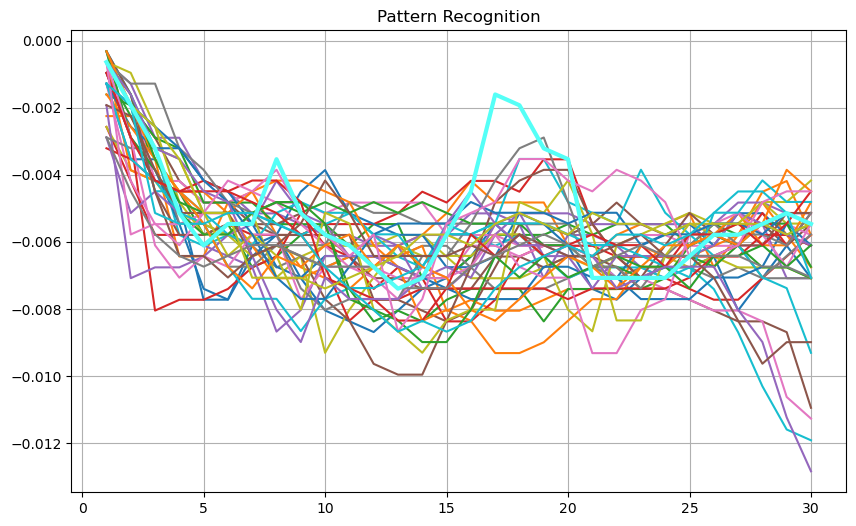

Entire processing took: 18.19649314880371 seconds
......................................................
......................................................
len(patternAr):  36941
len(performanceAr):  36941
Pattern storing took: 1.1105308532714844
##################################
howSim:  78.24097868582582
patternRecognition:  373
patForRec:  [-0.0012858511370222917, -0.002571702274030308, -0.00450047897954947, -0.0054648673323019125, -0.004821941763805042, -0.004821941763805042, -0.0028931650582858805, -0.00450047897954947, -0.005143404548060616, -0.0054648673323019125, -0.006107792900813058, -0.006750718469324204, -0.006429255685068632, -0.005143404548060616, -0.0038575534110383237, -0.000964388352752443, -0.0012858511370222917, -0.0025717022740445834, -0.0028931650582858805, -0.006429255685068632, -0.006429255685068632, -0.006429255685068632, -0.006429255685068632, -0.005786330116571761, -0.005143404548060616, -0.005143404548060616, -0.004821941763805042, -0.00450047897954947, 

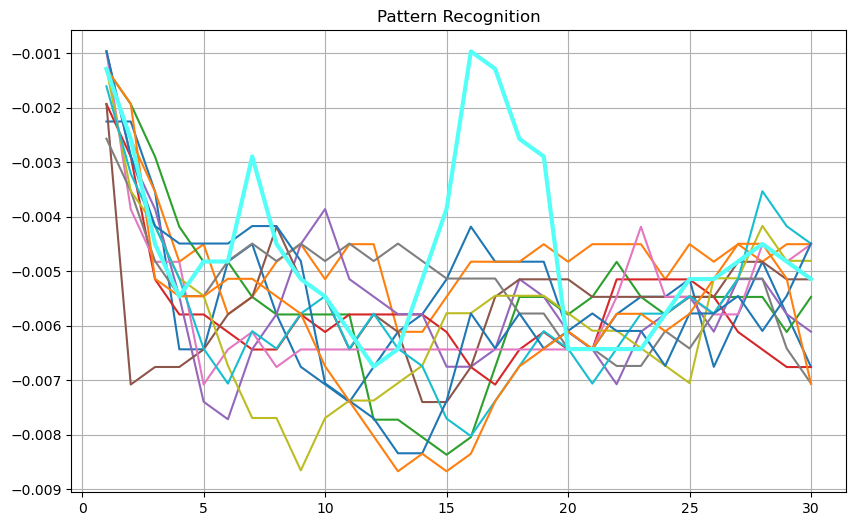

Entire processing took: 20.61187243461609 seconds
......................................................
......................................................
len(patternAr):  36942
len(performanceAr):  36942
Pattern storing took: 1.315396785736084
Entire processing took: 22.940950632095337 seconds
......................................................
......................................................
len(patternAr):  36943
len(performanceAr):  36943
Pattern storing took: 1.5653610229492188
Entire processing took: 25.388914346694946 seconds
......................................................
......................................................
len(patternAr):  36944
len(performanceAr):  36944
Pattern storing took: 1.1767146587371826
Entire processing took: 27.281972885131836 seconds
......................................................
......................................................
len(patternAr):  36945
len(performanceAr):  36945
Pattern storing took: 1.13231730461

KeyboardInterrupt: 

In [21]:
# Forward Testing/Rolling Window
dataLength = int(bid.shape[0])
print('data length is', dataLength)
toWhat = 37000

while toWhat < dataLength:
    print('......................................................')
    avgLine = ((bid+ask)/2)
    avgLine = avgLine[:toWhat]

    patternAr = []
    performanceAr = []
    patForRec = []
    
    patternStorage()
    currentPattern()
    patternRecognition()
    totalEnd = time.time()-totalStart
    print('Entire processing took:',totalEnd,'seconds')
    print('......................................................')
    #moveOn = input('press ENTER to continue...') 
    toWhat += 1